In [43]:
# Importing Libraries
import torch
import numpy as np
from matplotlib import pyplot as plt
import random
import torchvision
from torch.utils.data import DataLoader
from torch import nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import optim
from torch.nn import functional as F

In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # checking device type
print(device)

cuda


In [45]:
# Convolutional Neural Network
class cnn(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(cnn, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=5, padding= 2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=5, padding=2)
        self.FC1 = nn.Linear(16 * 7 * 7, 300) # image of size 28 * 28 are reduced to 7 * 7 by two pool operations of size (2,2)
        self.FC2 = nn.Linear(300, 112)
        self.FC3 = nn.Linear(112, 120)
        self.FC4 = nn.Linear(120, 10) # Final Layer

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.FC1(x))
        x = F.relu(self.FC2(x))
        x = F.relu(self.FC3(x))
        x = self.FC4(x)
        return x

In [46]:
input_channel = 1
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

In [47]:
train_dataset = datasets.MNIST(root = '.', train= True, transform = transforms.ToTensor(), download = True)
train_loader = DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_dataset = datasets.MNIST(root = '.', train= False, transform = transforms.ToTensor(), download = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = True)

In [48]:
model = cnn(input_channel, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [49]:
costs=[]
accuracy=[]

In [50]:
for epoch in range(num_epochs): # number of iterations
    for _, (data, targets) in enumerate(train_loader , 0): # one min-batch goes through each iteration of size batch_size
        # Converting to acceptable format
        data, targets = data.to(device), targets.to(device)

        # Forward pass
        output = model(data)
        loss = criterion(output, targets)
        costs.append(loss.item())

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculating accuracy
        _,predicted=torch.max(output.data,1)
        true=(predicted==targets).sum().item()
        accuracy.append(true/targets.size(0))
    
    print('Epoch: {}/{}, Loss: {:.4f}'
    .format(epoch+1,num_epochs,loss.item()))

Epoch: 1/10, Loss: 0.1589
Epoch: 2/10, Loss: 0.0644
Epoch: 3/10, Loss: 0.0591
Epoch: 4/10, Loss: 0.0005
Epoch: 5/10, Loss: 0.0011
Epoch: 6/10, Loss: 0.0005
Epoch: 7/10, Loss: 0.0021
Epoch: 8/10, Loss: 0.0003
Epoch: 9/10, Loss: 0.0726
Epoch: 10/10, Loss: 0.0012


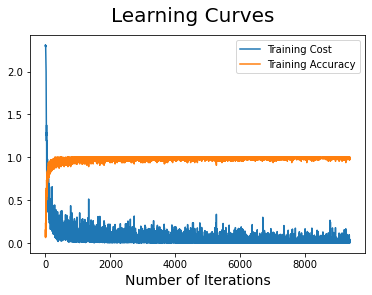

In [51]:
fig = plt.figure()
fig.suptitle('Learning Curves', fontsize=20)
plt.xlabel('Number of Iterations', fontsize=14)
plt.plot(costs, label = 'Training Cost')
plt.plot(accuracy, label = 'Training Accuracy')
plt.legend()
plt.show()

In [52]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device = device)
            y = y.to(device = device)
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        
    model.train()
    return num_correct/num_samples * 100


In [53]:
training_accuracy = check_accuracy(train_loader, model)
testing_accuracy = check_accuracy(test_loader, model)
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Training Accuracy: 99.71334075927734
Testing Accuracy: 98.99999237060547


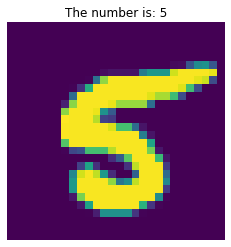

In [66]:
index=random.randint(0,len(test_dataset))

with torch.no_grad():
    data=test_dataset[index][0].view(1,1,28,28)
    data=data.to(device)
    output=model(data)
    _,predicted=torch.max(output.data,1)

    plt.imshow(test_dataset[index][0].view(28,28))
    plt.title('The number is: {}'.format(predicted.item()))
    plt.axis('off')
    plt.show()